# Wrangling data and plotting

Based on the dataset 
https://docs.google.com/spreadsheets/d/1iEl565M1mICTubTtoxXMdxzaHzAcPTnb3kpRndsrfyY/edit?ts=5bd7f609#gid=671375968

## tidyverse

This package contains both dplyr and ggplot2, so it is very useful

### Piping

The sequence %>% is used to pipe commands together

### Projection

To select:
 - data %>% select(vbl1, vbl2,..., vbln)
 
### Selection
 
 To select:
 
 - data %>% filter(vbl1 == value)
 
 To extract 1 column, use 'pull'

In [1]:
library(tidyverse)
library(lubridate)
library(zoo)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”
Warning message:
“package ‘tibble’ was built under R version 3.6.2”
Warning message:
“package ‘tidyr’ was built under R version 3.6.2”
Warning message:
“package ‘purrr’ was built under R version 3.6.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘lubridate’ was built under R version 3.6.2”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:dplyr’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Warning message:
“package ‘zoo’ was built under R version

In [2]:
dfsource<-"./data/POTUS_approval.csv"
polls <- read.csv(dfsource, stringsAsFactors = F)

In [3]:
head(polls)

,President,Start.Date,End.Date,Approving,Disapproving,Unsure.NoData
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,Barack Obama,16/01/2017,19/01/2017,59,37,4
2,Barack Obama,09/01/2017,15/01/2017,57,39,4
3,Barack Obama,02/01/2017,08/01/2017,55,42,3
4,Barack Obama,26/12/2016,01/01/2017,55,40,5
5,Barack Obama,19/12/2016,25/12/2016,56,40,4
6,Barack Obama,12/12/2016,18/12/2016,56,40,4


In [4]:
polls<-polls %>% 
  rename(
    Date = Start.Date,
    EndDate = End.Date,
    Approve = Approving,
    Disapprove = Disapproving
    )

In [5]:
str(polls)

'data.frame':	1305 obs. of  6 variables:
 $ President    : chr  "Barack Obama" "Barack Obama" "Barack Obama" "Barack Obama" ...
 $ Date         : chr  "16/01/2017" "09/01/2017" "02/01/2017" "26/12/2016" ...
 $ EndDate      : chr  "19/01/2017" "15/01/2017" "08/01/2017" "01/01/2017" ...
 $ Approve      : int  59 57 55 55 56 56 57 54 56 56 ...
 $ Disapprove   : int  37 39 42 40 40 40 40 43 40 41 ...
 $ Unsure.NoData: int  4 4 3 5 4 4 3 3 4 3 ...


In [6]:
polls$Date<-dmy(polls$Date)

In [7]:
str(polls)

'data.frame':	1305 obs. of  6 variables:
 $ President    : chr  "Barack Obama" "Barack Obama" "Barack Obama" "Barack Obama" ...
 $ Date         : Date, format: "2017-01-16" "2017-01-09" ...
 $ EndDate      : chr  "19/01/2017" "15/01/2017" "08/01/2017" "01/01/2017" ...
 $ Approve      : int  59 57 55 55 56 56 57 54 56 56 ...
 $ Disapprove   : int  37 39 42 40 40 40 40 43 40 41 ...
 $ Unsure.NoData: int  4 4 3 5 4 4 3 3 4 3 ...


In [8]:
TrumpApprove <- polls %>% 
  select(President, Date, Approve) %>%
  filter (President == "Donald Trump")

## Aggregation

grouping is done using group_by(variable)

Summarising functions include mean(), median()

In [9]:
polls %>% 
    group_by(President) %>%
    summarise(MeanApproval = mean(Approve))

President,MeanApproval
<chr>,<dbl>
Barack Obama,47.96890
Donald Trump,40.38298
George Bush,61.41593
George W. Bush,51.34752
Ronald Reagan,52.23704
William J. Clinton,55.49074


In [10]:
nrow(polls)

[1] 1305

In [11]:
polls <- drop_na(polls)

In [12]:
nrow(polls)

[1] 1305

In [13]:
#To extract this as vector 
Avgpolls <- polls%>% 
    group_by(President) %>%
    summarise(MeanApproval = mean(Approve)) 
Avgpolls

President,MeanApproval
<chr>,<dbl>
Barack Obama,47.96890
Donald Trump,40.38298
George Bush,61.41593
George W. Bush,51.34752
Ronald Reagan,52.23704
William J. Clinton,55.49074


In [14]:
Avgpolls %>%     pull(MeanApproval)

[1] 47.96890 40.38298 61.41593 51.34752 52.23704 55.49074

In [15]:
Avgpolls$MeanApproval

[1] 47.96890 40.38298 61.41593 51.34752 52.23704 55.49074

### Getting moving averages

This is an average over a time frame time.  For this, we need the lubridate package

In [16]:
library(lubridate)
date <-ymd("2021-02-17")
date
month(date)
month(date, label=T)

[1] "2021-02-17"

[1] 2

[1] Feb
12 Levels: Jan < Feb < Mar < Apr < May < Jun < Jul < Aug < Sep < ... < Dec

In [17]:
TrumpPolls <-polls %>%
    select(President, Date, Approve, Disapprove) %>%
    filter (President == "Donald Trump") %>%
  arrange(Date) 
head(TrumpPolls)

,President,Date,Approve,Disapprove
,<chr>,<date>,<int>,<int>
1,Donald Trump,2017-01-20,45,47
2,Donald Trump,2017-01-30,43,52
3,Donald Trump,2017-02-06,41,53
4,Donald Trump,2017-02-13,40,54
5,Donald Trump,2017-02-20,42,53
6,Donald Trump,2017-02-27,43,51


In [18]:
TrumpApprove<-TrumpPolls %>%
    mutate(AvgApprove = rollmean(Approve, 10, na.pad=TRUE, align="right"))


In [19]:

head(TrumpApprove)

,President,Date,Approve,Disapprove,AvgApprove
,<chr>,<date>,<int>,<int>,<dbl>
1,Donald Trump,2017-01-20,45,47,NA
2,Donald Trump,2017-01-30,43,52,NA
3,Donald Trump,2017-02-06,41,53,NA
4,Donald Trump,2017-02-13,40,54,NA
5,Donald Trump,2017-02-20,42,53,NA
6,Donald Trump,2017-02-27,43,51,NA


Warning message:
“Removed 9 row(s) containing missing values (geom_path).”


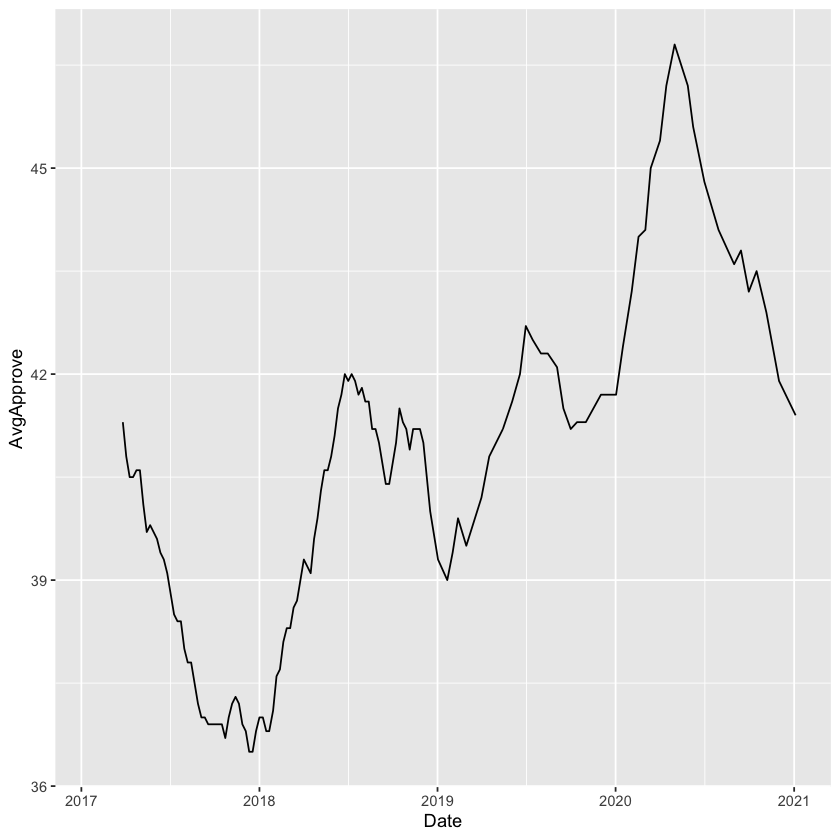

In [20]:
ggplot(data = TrumpApprove, aes(x=Date,y=AvgApprove)) + 
  geom_line()